[ 14.30064641  14.22494761  14.15225512  14.13712296  14.09143791
  14.08006671]


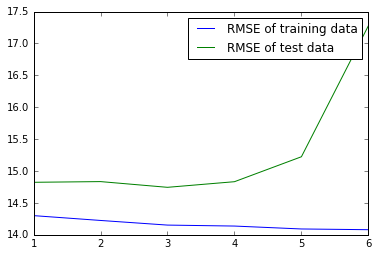

In [13]:
import numpy as np
from matplotlib import pyplot as plt
#1
#(a)(i)
#input the data
data=np.loadtxt("train_graphs_f16_autopilot_cruise.csv",delimiter=",", skiprows=1,usecols=(1,2,3,4,5,6,7))
data2=np.loadtxt("test_graphs_f16_autopilot_cruise.csv",delimiter=",", skiprows=1,usecols=(1,2,3,4,5,6,7))
X=data[:,:-1] #X is a feature set
Y=data[:,-1] #Y is an array with target value
X2=data2[:,:-1]#X2 is a feature set of test value
Y2=data2[:,-1] #Y2 is an array with test target value
Intercept=np.ones((Y.size,1))
X1=np.concatenate((X,Intercept),axis=1)
Intercept2=np.ones((Y2.size,1))
X22=np.concatenate((X2,Intercept2),axis=1)
M=np.array([1,2,3,4,5,6])
#get the RMSE of training data
#get the RMSE of test data
RMSE=np.zeros(6)
RMSEE=np.zeros(6)
A1=X1
B1=np.dot(np.linalg.pinv(A1),Y)
w=B1
A2=X22
s1=np.power(np.dot(A1,w)-Y,2)
s2=np.power(np.dot(A2,w)-Y2,2)
RMSE[0]=np.sqrt(np.sum(s1)/Y.size)
RMSEE[0]=np.sqrt(np.sum(s2)/Y2.size)
for i in range(0,5):
    A1=(np.concatenate((A1.T,np.power(X,i+2).T))).T
    A2=(np.concatenate((A2.T,np.power(X2,i+2).T))).T
    B1=np.dot(np.linalg.pinv(A1),Y)
    w=B1
    s1=np.power(np.dot(A1,w)-Y,2)
    s2=np.power(np.dot(A2,w)-Y2,2)
    RMSE[i+1]=np.sqrt(np.sum(s1)/Y.size)
    RMSEE[i+1]=np.sqrt(np.sum(s2)/Y2.size)
print RMSE
%matplotlib inline
#plot it
plt.plot(M,RMSE,label='RMSE of training data') 
plt.plot(M,RMSEE,label='RMSE of test data') 
plt.legend()
plt.savefig('plot1')
plt.show()

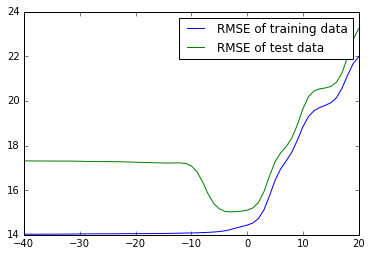

In [15]:
#(a)(ii)
lnlambda=np.arange(-40,21)
#get the RMSE of training data
#get the RMSE of test data
#A1=X1
#A2=X22
RMSE=np.zeros(lnlambda.size)
RMSE2=np.zeros(lnlambda.size)
D=np.identity(37)
#for i in range(0,5):
#    A1=(np.concatenate((A1.T,np.power(X,i+2).T))).T
#    A2=(np.concatenate((A2.T,np.power(X2,i+2).T))).T
for j in range(0,lnlambda.size):
    C=np.dot(A1.T,A1)+np.exp(lnlambda[j])*D
    C=np.dot(np.linalg.inv(C),A1.T)
    w=np.dot(C,Y)
    s1=np.power(np.dot(A1,w)-Y,2)
    s2=np.power(np.dot(A2,w)-Y2,2)
    RMSE[j]=np.sqrt((np.sum(s1)+(np.exp(lnlambda[j]))*np.power(np.linalg.norm(w),2))/Y.size)
    RMSE2[j]=np.sqrt((np.sum(s2)+(np.exp(lnlambda[j]))*np.power(np.linalg.norm(w),2))/Y2.size)
#plot it
plt.plot(lnlambda,RMSE,label='RMSE of training data') 
plt.plot(lnlambda,RMSE2,label='RMSE of test data') 
plt.legend()
plt.savefig('plot2')
plt.show()

In [ ]:
#get tao
tao=np.logspace(-2,1,num=10,base=2)
#impute data
datal=np.loadtxt("test_locreg_f16_autopilot_cruise.csv",delimiter=",", skiprows=1,usecols=(1,2,3,4,5,6,7))
X1=data[:,:-1]
X22=datal[:,:-1]
Y2=datal[:,-1]
X1=(X1-np.mean(X1,0))/np.std(X1,0)
X22=(X22-np.mean(X22,0))/np.std(X22,0)

#get r(x)
def r(x,taoi):
    a=np.eye(Y.size)
    for i in range(0,Y.size):
        a[i,i]=np.exp(-(np.linalg.norm(x-X1[i,:]))**2/(2*(np.power(taoi,2))))
    return a
def w(feature,weight,target):
    return np.dot(np.dot(np.linalg.pinv(np.dot(np.sqrt(weight),feature)),np.sqrt(weight)),target)
RMSEl=np.zeros(tao.size)
for k in range(0,tao.size):
    for j in range(0,Y2.size):
        RMSEl[k]=RMSEl[k]+np.power((np.dot(w(X1,r(X22[j,:],tao[k]),Y).T,X22[j,:])-Y2[j]),2)
    RMSEl[k]=np.sqrt(RMSEl[k]/Y2.size)
print RMSEl
%matplotlib inline
#plot it
plt.plot(tao,RMSEl,"-g",label="RMSE of local reg")
plt.legend()
plt.savefig('plot4')
plt.show()

In [5]:
#2)
#input the data
data=np.loadtxt("steel_composition_train.csv",delimiter=",", skiprows=1,usecols=(1,2,3,4,5,8,9))
data2=np.loadtxt("steel_composition_test.csv",delimiter=",", skiprows=1,usecols=(1,2,3,4,5,8))
X=data[:,:-1] #X is a feature set
Y=data[:,-1] #Y is an array with target value
X2=data2#X2 is a feature set of test value
Intercept=np.ones((Y.size,1))
X1=np.concatenate((X,Intercept),axis=1)
Intercept2=np.ones((X2[:,0].size,1))
X22=np.concatenate((X2,Intercept2),axis=1)
#M=np.array([1,2,3,4,5,6])
#get the RMSE of training data
#get the RMSE of test data
#RMSE=np.zeros(6)
#RMSEE=np.zeros(6)
A1=X1
B1=np.dot(np.linalg.pinv(A1),Y)
w=B1
A2=X22
s1=np.power(np.dot(A1,w)-Y,2)
RMSE=np.sqrt(np.sum(s1)/Y.size)
for i in range(0,3):
    A1=(np.concatenate((A1.T,np.power(X,i+2).T))).T
    A2=(np.concatenate((A2.T,np.power(X2,i+2).T))).T
    B1=np.dot(np.linalg.pinv(A1),Y)
    w=B1
Y2=np.dot(A2,w)
Y2=np.array(Y2)
print Y2.shape
import csv
fl = open('steel_result.csv', 'w')

writer = csv.writer(fl,lineterminator='\n')
#writer.writerow(['id', 'Strength']) #if needed
for values in Y2:
    writer.writerow([values])

fl.close()  

(412L,)


In [5]:
data=np.loadtxt("spambase.train",delimiter=",")
data2=np.loadtxt("spambase.test",delimiter=",")
X=np.concatenate((data,data2))
X.shape
for i in range(0,X[0,:].size-1):
    m=np.median(X[:,i])
    for j in range(0,data[:,0].size):
        if data[j,i]<m:
            data[j,i]=1
        else:
            data[j,i]=2
    for j in range(0,data2[:,0].size):
        if data2[j,i]<m:
            data2[j,i]=1
        else:
            data2[j,i]=2
#step1 pie
pspam=(np.float16(np.count_nonzero(data[:,-1])+1))/np.float16((data[:,-1].size+2))
pham=1-pspam
print pham
#step2 sita
Qspam=np.zeros((data[0,:].size-1,1))#conditional on spam
for i in range(0,data[0,:].size-1):
    count=0
    for j in range(0,data[:,0].size):
        if data[j,-1]==1 and data[j,i]==1:
            count=count+1
        else:
            count=count
    Qspam[i,0]=np.float16((count+1))/np.float16((np.count_nonzero(data[:,-1])+2))
Qham=np.zeros((data[0,:].size-1,1))#conditional on ham
for i in range(0,data[0,:].size-1):
    count=0
    for j in range(0,data[:,0].size):
        if data[j,-1]==0 and data[j,i]==1:
            count=count+1
        else:
            count=count
    Qham[i,0]=np.float16((count+1))/np.float16((data[:,-1].size-np.count_nonzero(data[:,-1])+2))
#step3 use test value
Y=np.zeros((data2[:,0].size,1))
for i in range(0,data2[:,0].size):
    ppspam=1
    ppham=1
    for j in range(0,data2[0,:].size-1):
        if data2[i,j]==1:
            ppspam=ppspam*Qspam[j,0]
            ppham=ppham*Qham[j,0]
        else:
            ppspam=ppspam*(1-Qspam[j,0])
            ppham=ppham*(1-Qham[j,0])
    ppspam=ppspam*pspam
    ppham=ppham*pham
    if ppspam>ppham:
        Y[i,0]=1
    else:
        Y[i,0]=0
#step4 get test error
con=0
for i in range(0,data2[:,0].size):
    if Y[i]==data2[i,-1]:
        con=con+1
    else:
        con=con
percent=np.float16(con)/np.float(data2[:,0].size)
percent=1-percent
print percent

0.594970703125
0.250288350634


In [7]:
#Assume all is ham
Z=np.zeros((data2[:,0].size,1))
con=0
for i in range(0,data2[:,0].size):
    if Z[i]==data2[i,-1]:
        con=con+1
    else:
        con=con
percent=np.float16(con)/np.float(data2[:,0].size)
percent=1-percent
print percent

0.385620915033
